# Section 2.2.3: Logistic Regression
## by Telmo Cunha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Binary Logistic Regression

In [2]:
X=np.array([[-1,0],[0,0.25],[1,1],[1,-1]])
Y=np.array([0,1,1,0])

In [3]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [4]:
def cross_entropy_loss(X,Y,w):
    
    n_examples=X.shape[0]
    dim=X.shape[1]
    
    phi=np.insert(X,0,1,axis=1)
    
    Y=Y.reshape((n_examples,1))
 
    a=np.dot(np.log(sigmoid(np.dot(w.T,phi.T))),Y)
    b=np.dot(np.log(1-sigmoid(np.dot(w.T,phi.T))),1-Y)
    
    L=-a-b
    
    return L[0][0]

In [5]:
def plot_plane(w):

    #plot datapoints
    for j in range(X.shape[0]):
        if(Y[j]==0):
            plt.scatter(X[j][0],X[j][1], c='blue',marker='o')
        elif(Y[j]==1):
             plt.scatter(X[j][0],X[j][1], c='red',marker='+')
    
    #plot separating line
    xx = np.linspace(-1.5, 1.5,200)
    yy = -((w[1][0])/(w[2][0]))*xx-(w[0][0])/(w[2][0])
    
    plt.plot(xx, yy, 'k-')
    plt.show()

In [6]:
def bin_logistic_regression(X,Y,mode="fgd",eta=1):
    
    N=X.shape[0]
    dim=X.shape[1]

    eta=1
    max_epochs=10
    epochs=0
    
    loss=[]
    w=np.zeros((dim+1,1))
    
    phi=np.insert(X,0,1,axis=1)

    while(epochs<max_epochs):
        epochs+=1
        
        #full gradient descent
        if(mode=="fgd"):        
            a=sigmoid(np.dot(w.T,phi.T))-Y
            a=a.reshape((N,1))
            der_term=a*phi
            der_term=np.sum(der_term,axis=0)
            w-=eta*der_term.reshape((dim+1,1))
            
        elif(mode=="sgd"):
            for n in range(N):
                a=sigmoid(np.dot(w.T,phi[n,:].T))-Y[n]
                der_term=a*phi[n,:]
                w-=eta*der_term.reshape((dim+1,1))
            
        print("Epoch:",epochs)
        print("w:",w.T[0])
        a=cross_entropy_loss(X,Y,w)
        loss.append(a)
        print("loss:",a)
        plot_plane(w)  
        
    return w

### Full gradient descent Results

Epoch: 1
w: [0.    0.5   1.125]
loss: 1.6448997557052882


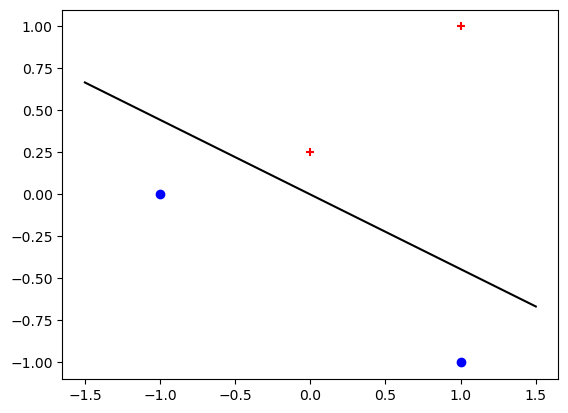

Epoch: 2
w: [-0.13152199  0.693412    1.74569844]
loss: 1.2776187768408862


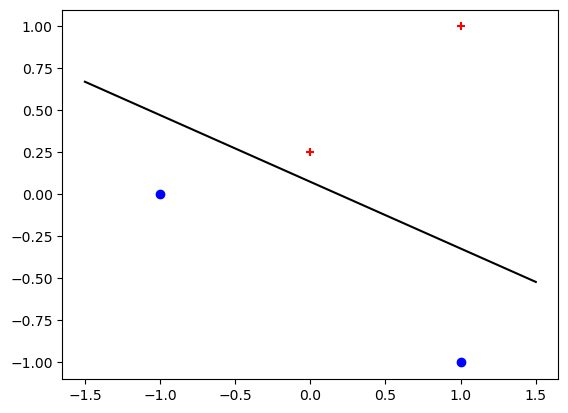

Epoch: 3
w: [-0.15575156  0.85425763  2.17665285]
loss: 1.0885709127087182


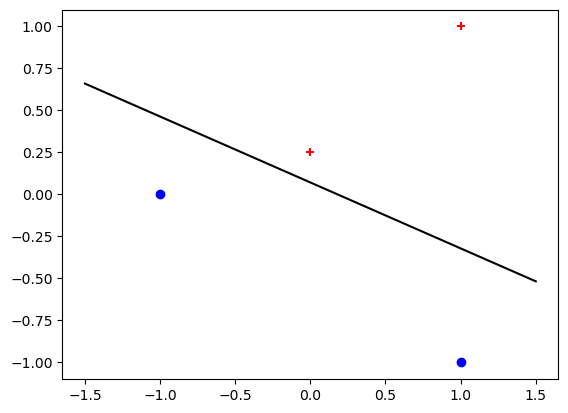

Epoch: 4
w: [-0.15094209  0.98892348  2.51678058]
loss: 0.9652824095687564


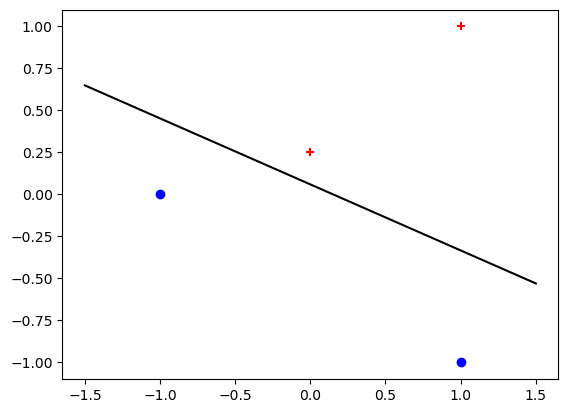

Epoch: 5
w: [-0.13413738  1.10775355  2.80344088]
loss: 0.8745798655086907


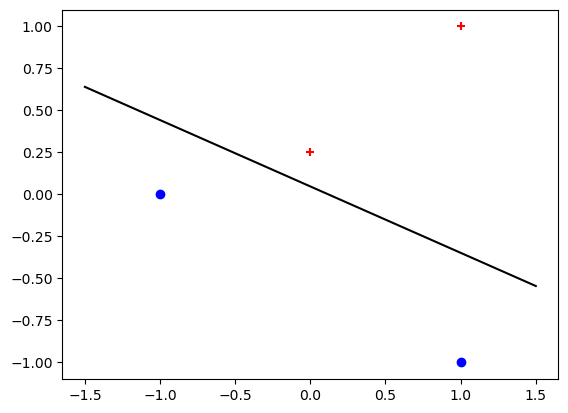

Epoch: 6
w: [-0.11213246  1.21597914  3.0545761 ]
loss: 0.8030327398270931


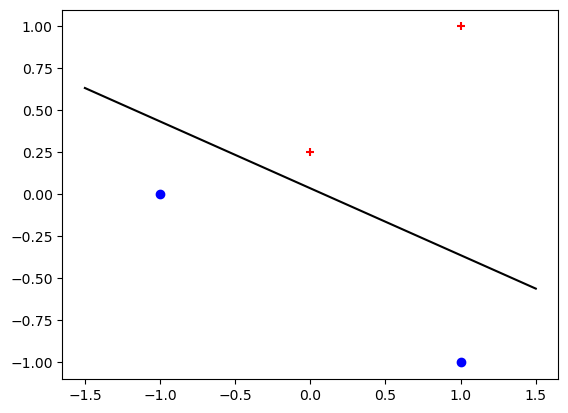

Epoch: 7
w: [-0.08803763  1.31636879  3.28010378]
loss: 0.7440831411558816


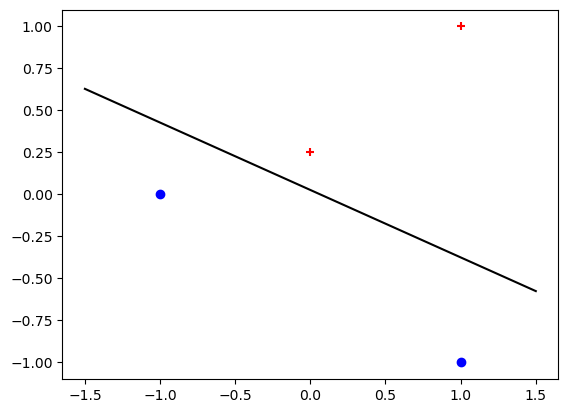

Epoch: 8
w: [-0.06337461  1.41050887  3.48606248]
loss: 0.6940875595953644


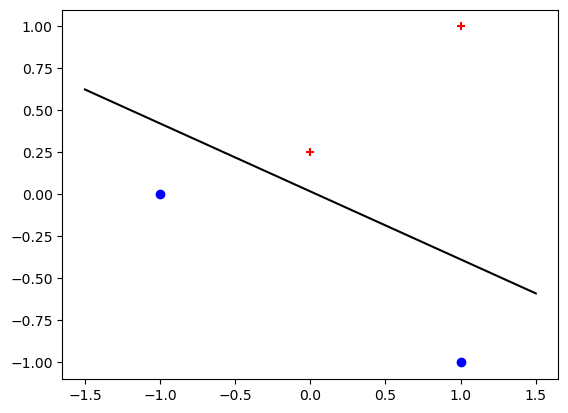

Epoch: 9
w: [-0.03891312  1.49938971  3.67640271]
loss: 0.6508203262279475


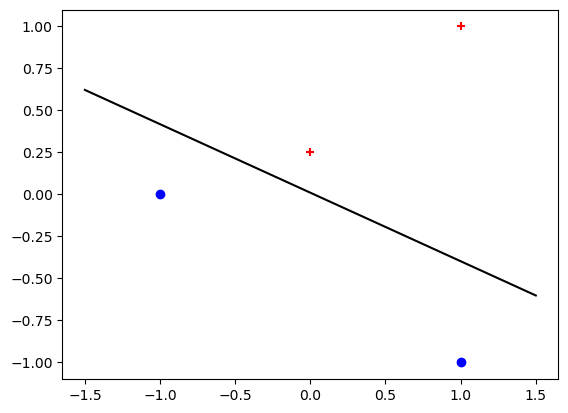

Epoch: 10
w: [-0.01504407  1.5836841   3.85385851]
loss: 0.6128194991099414


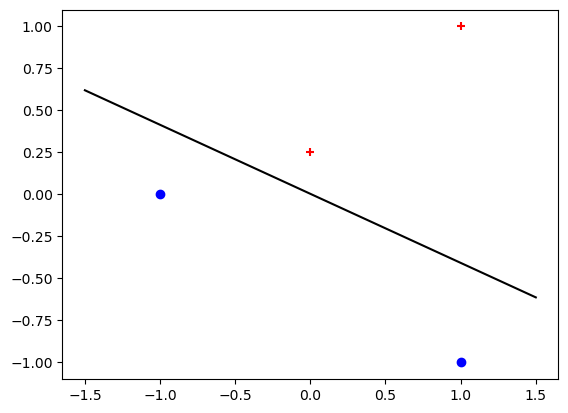

In [7]:
w=bin_logistic_regression(X,Y,mode="fgd")

### Stochastic gradient descent Results

Epoch: 1
w: [-0.24882603  0.12871464  1.15637038]
loss: 1.745036350338789


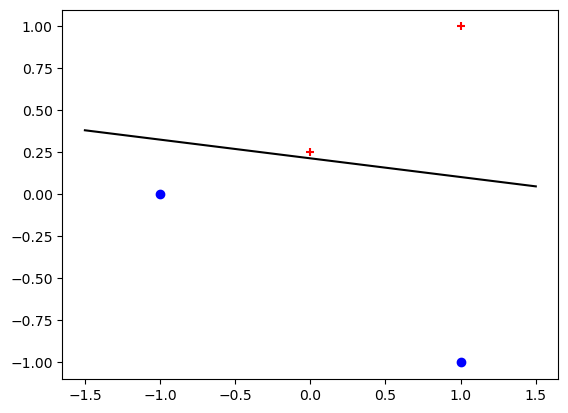

Epoch: 2
w: [-0.25431834  0.34606094  1.78335914]
loss: 1.3510652064879003


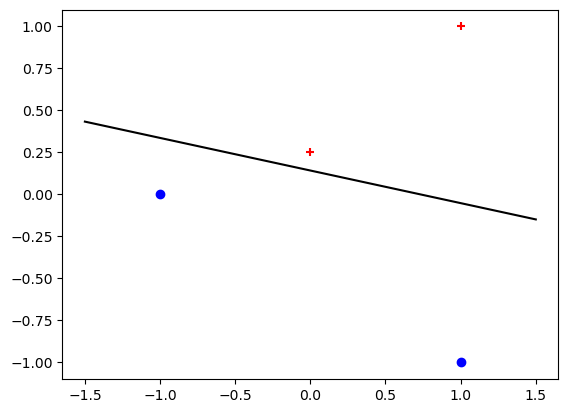

Epoch: 3
w: [-0.22464037  0.54365844  2.21990668]
loss: 1.1378551670879369


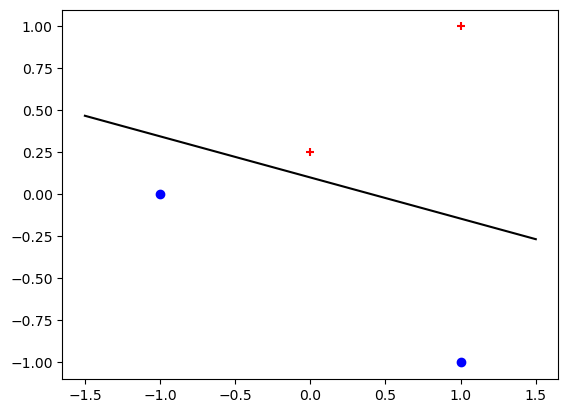

Epoch: 4
w: [-0.1884155   0.71694997  2.56904011]
loss: 0.9977132470255619


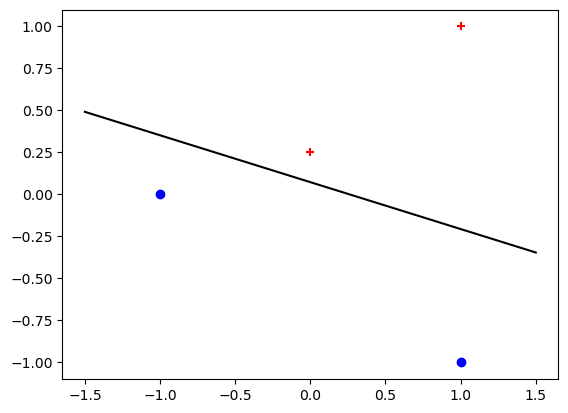

Epoch: 5
w: [-0.15111609  0.87152665  2.8667137 ]
loss: 0.8949218174092715


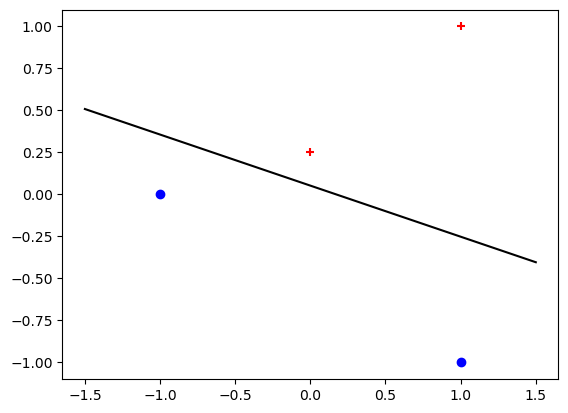

Epoch: 6
w: [-0.11480187  1.01156579  3.12952178]
loss: 0.8144226054379651


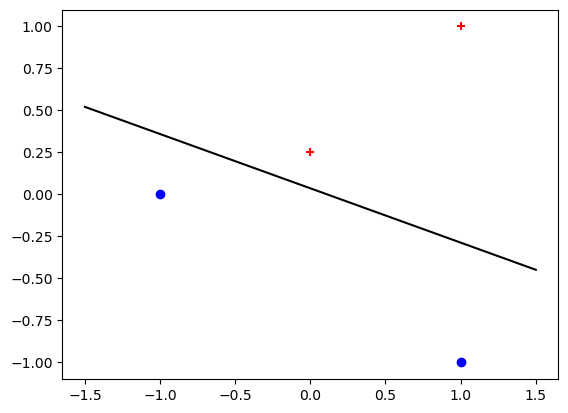

Epoch: 7
w: [-0.08030788  1.13986418  3.36654019]
loss: 0.7487013759516296


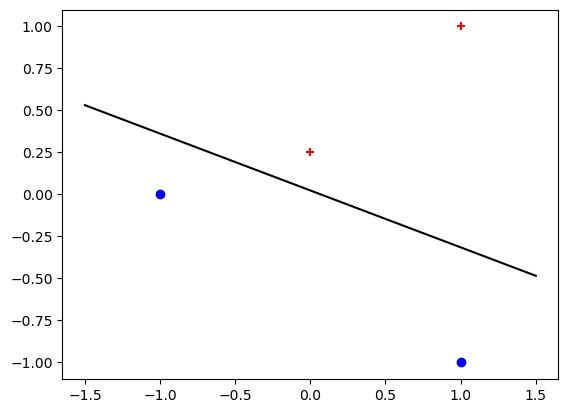

Epoch: 8
w: [-0.04790646  1.2583586   3.58333835]
loss: 0.6935223330105538


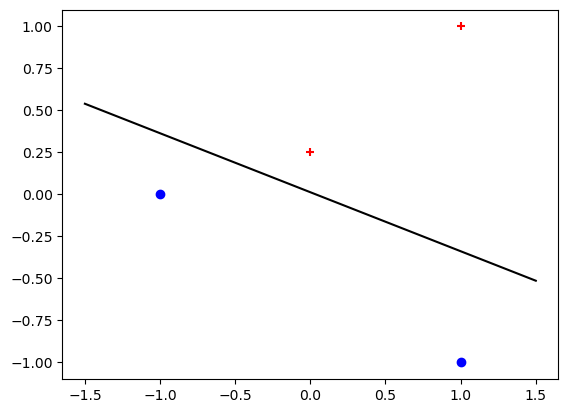

Epoch: 9
w: [-0.01760543  1.36846522  3.78363291]
loss: 0.6462668775410174


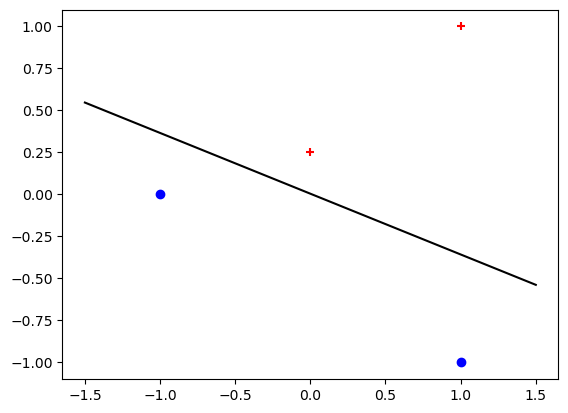

Epoch: 10
w: [0.01070527 1.47127238 3.9700663 ]
loss: 0.6051966564309375


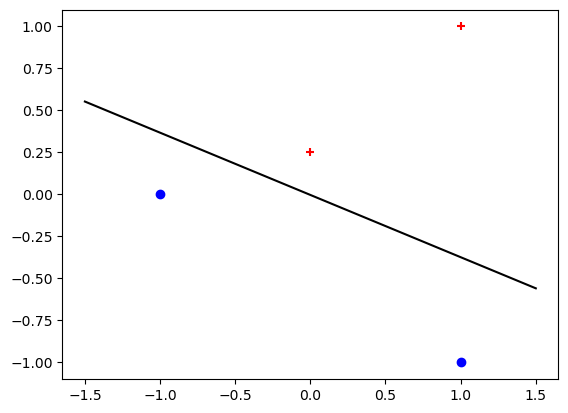

In [8]:
w=bin_logistic_regression(X,Y,mode="sgd")

## Digit classification using multiclass logistic regression

In [9]:
from sklearn.datasets import load_digits
data = load_digits()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 640x480 with 0 Axes>

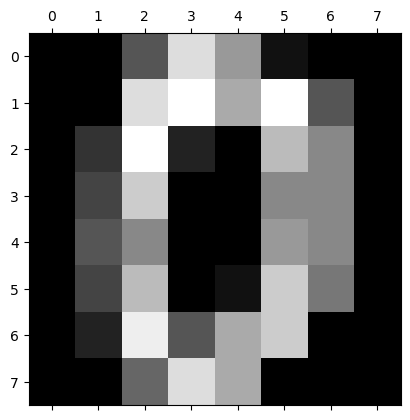

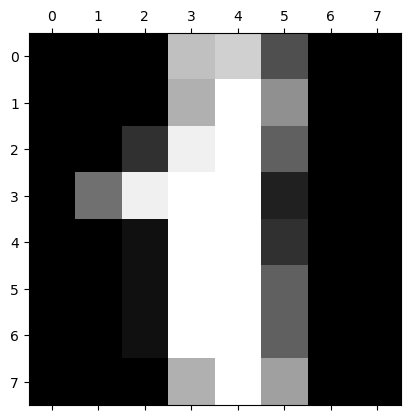

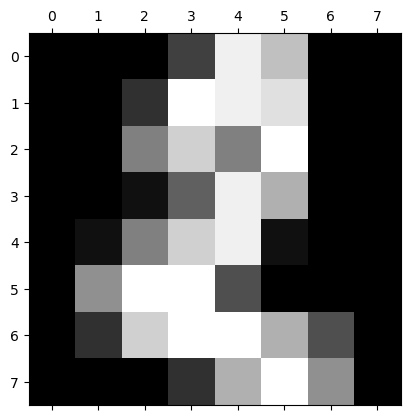

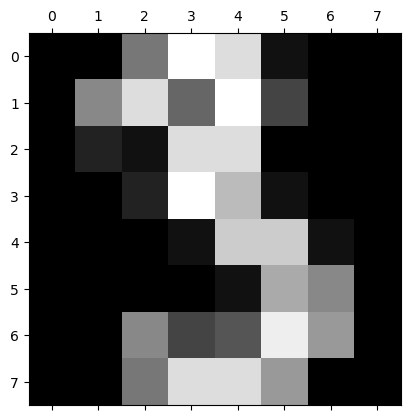

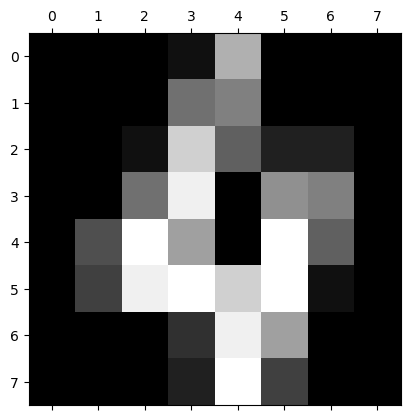

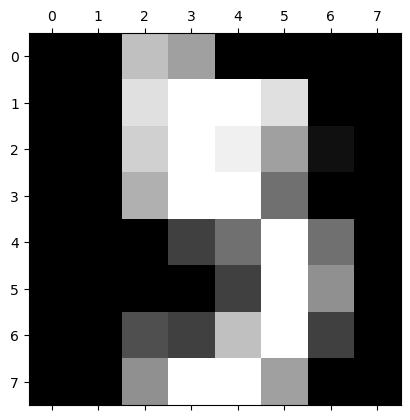

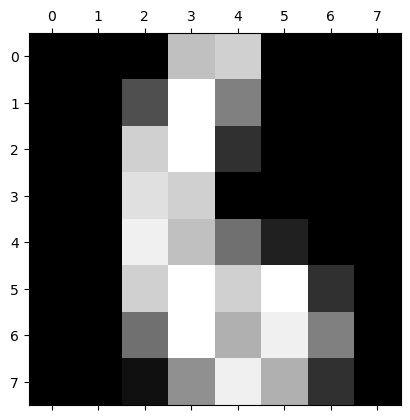

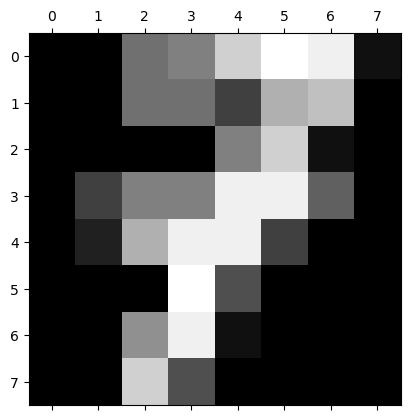

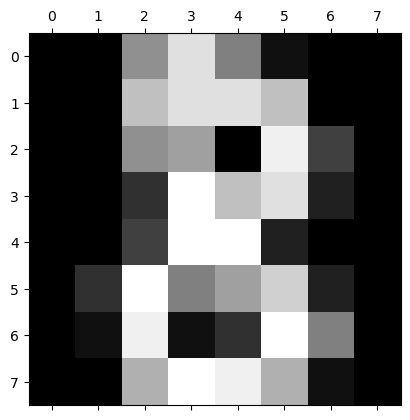

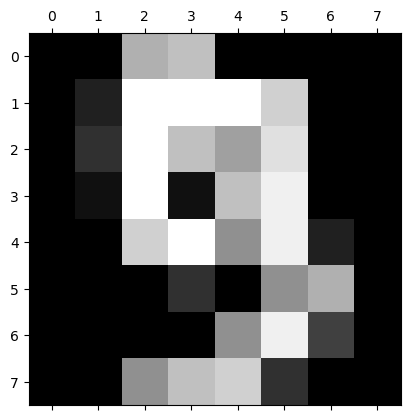

In [10]:
print(data.DESCR)
import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
    plt.matshow(data.images[i])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.images, data.target, test_size=0.2, random_state=42)

### Our Implementation

In [12]:
# formatting data
x_datatrain=np.zeros((X_train.shape[0],64))
for j in range(X_train.shape[0]):
    x_datatrain[j]=np.ndarray.flatten(X_train[j])

x_datatest=np.zeros((X_test.shape[0],64))
for j in range(X_test.shape[0]):
    x_datatest[j]=np.ndarray.flatten(X_test[j])

In [13]:
def softmax(x):
    x=np.exp(x)
    total_sum=np.sum(x)
    return x/total_sum

In [14]:
def loss_func(W,phi,Y):
    # a1.shape: classes x N
    a1=np.dot(W,phi.T)

    for n in range(a1.shape[1]):   
        a1[:,n]=softmax(a1[:,n])

    a1=np.log(a1)
    c=np.multiply(Y.T,a1)
    d=np.ndarray.flatten(c)
    result=-np.sum(d)
    
    return result

In [15]:
def one_hot(Y):
    classes=10
    return np.eye(int(classes))[Y]

In [16]:
def evaluate(W,z):
    y_aux1=np.dot(W,z.T)
    y_n=softmax(y_aux1)
    
    return y_n

In [17]:
def multiclass_logistic_regression_1epoch_sgd(phi,T,W):

    # stochastic gradient descent
    
    for n in range(N):
        t_n=T[n]
        y_n=evaluate(W,phi[n,:])
        aux2=(y_n-t_n).reshape((classes,1))
        
        for i in range(classes):
            W[i,:]+=-eta*aux2[i]*phi[n,:]
   
    return W

In [18]:
def accuracy(phi,Y,W):
    
    a1=np.dot(W,phi.T)
    predicted_labels=np.zeros((a1.shape[1],1))

    for n in range(a1.shape[1]):   
        predicted_labels[n]=np.argmax(a1[:,n])
    
    count=0
    Y=Y.reshape((a1.shape[1],1))
    
    z=predicted_labels-Y

    for i in z:
        if i[0]==0:
            count+=1
    
    return count/len(z)

In [19]:
epoch=0
max_epochs=100
classes=10
eta=0.001

N=x_datatrain.shape[0]
dim=x_datatrain.shape[1]

# initialize weights
W=np.zeros((classes,dim+1))

# shape N x K
y_train_onehot=one_hot(y_train)
y_test_onehot=one_hot(y_test)

phi_train=np.insert(x_datatrain,0,1,axis=1)
phi_test=np.insert(x_datatest,0,1,axis=1)

train_loss=[]
train_acc=[]
test_acc=[]

while(epoch<max_epochs):
    epoch+=1
    W=multiclass_logistic_regression_1epoch_sgd(phi_train,y_train_onehot,W)
    train_loss.append(loss_func(W,phi_train,y_train_onehot))
    train_acc.append(accuracy(phi_train,y_train,W))
    test_acc.append(accuracy(phi_test,y_test,W))

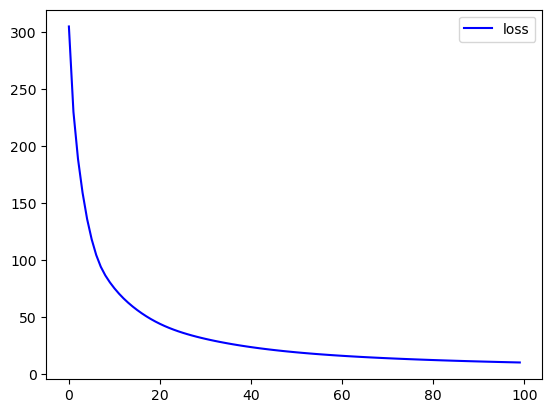

In [20]:
plt.plot(range(100), train_loss, 'b-', label='loss')
plt.legend()
plt.show()

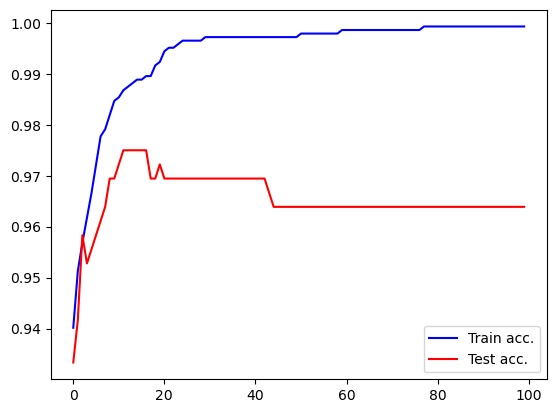

In [21]:
plt.plot(range(100), train_acc, 'b-', label='Train acc.')
plt.plot(range(100), test_acc, 'r-', label='Test acc.')
plt.legend()
plt.show()

In [22]:
print("Train acc:", train_acc[-1])
print("Test acc:",test_acc[-1])

Train acc: 0.9993041057759221
Test acc: 0.9638888888888889


### Solution based on Sklearn 

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='none')

clf.fit(x_datatrain, y_train)
print("Train acc:", clf.score(x_datatrain, y_train))
print("Test acc:", clf.score(x_datatest, y_test))

Train acc: 1.0
Test acc: 0.9638888888888889
